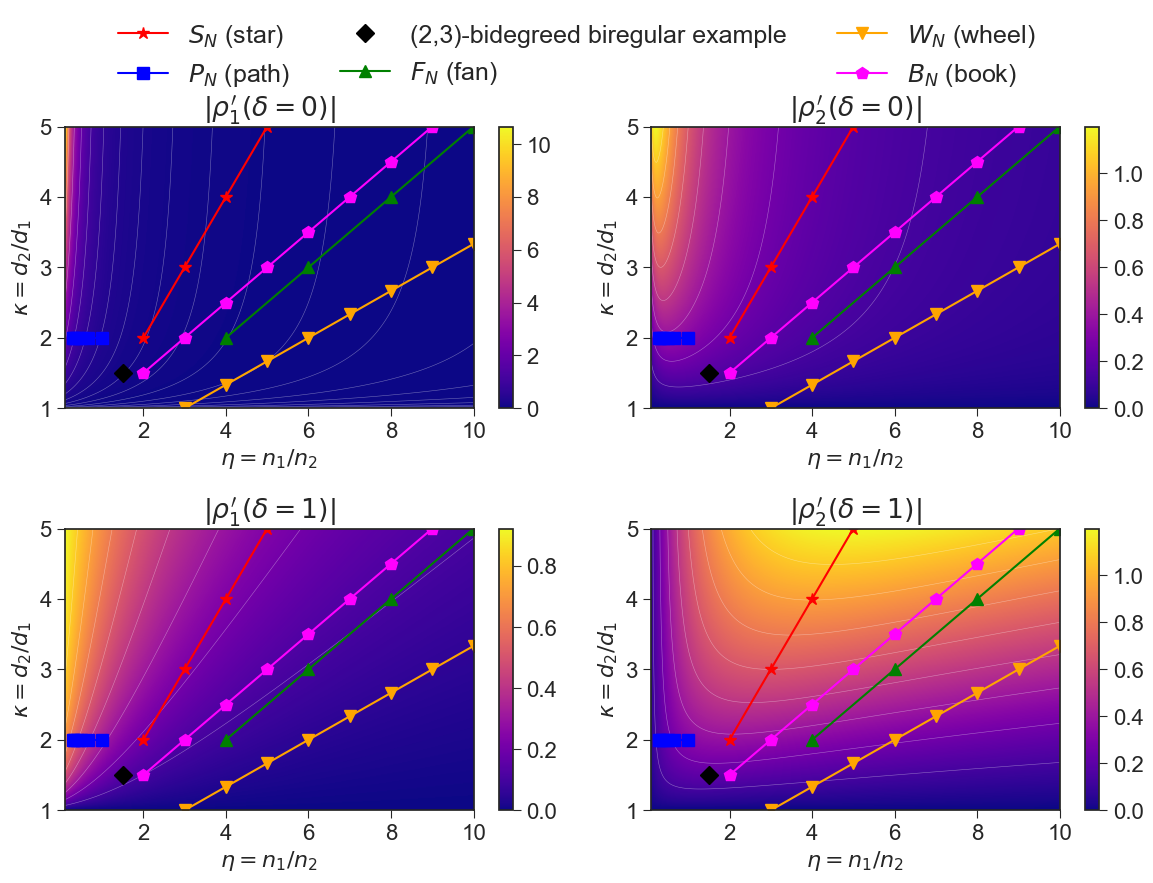

In [20]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-ticks")
plt.rcParams.update({'font.size': 16})

###############################################################################
# Derivative formulas in (eta, kappa) coordinates
#   eta    = n1 / n2  (count ratio low-degree / high-degree)
#   kappa = d2 / d1  (degree ratio high-degree / low-degree)
#
# We set d1 = 1, d2 = kappa, n1 = eta, n2 = 1 without loss of generality.
###############################################################################

def rho_derivs_eta(kappa, eta, delta):
  """
  Returns (rho1_prime, rho2_prime) at r=1 for a (d1,d2)-bidegreed graph
  with parameters
    d1 = 1, d2 = kappa
    n1 = eta, n2 = 1
  and Bd/dB mietang parameter delta.

  rho1_prime = d/d(delta) fp(neutral, starting at degree-d1 vertex)
  rho2_prime = d/d(delta) fp(neutral, starting at degree-d2 vertex)
  """
  d1 = 1.0
  d2 = kappa
  n1 = eta
  n2 = 1.0

  D = d1 * n2 + d2 * n1 + delta * (d1 - d2) * (n1 - n2)
  num_common = (d1 - d2) * (d1 + d2)

  rho1_prime = n2 * num_common / (D ** 2)
  rho2_prime = -n1 * num_common / (D ** 2)
  return rho1_prime, rho2_prime


def overlay_families_eta(ax):
  """
  Overlay the canonical bidegreed families in the (eta, kappa) plane:

    eta    = n1/n2
    kappa = d2/d1
  """

  ms = 9

  # Star S_N: d1=1, d2 = N-1, n1 = N-1, n2 = 1
  # => kappa = N-1, eta = N-1  (lies on eta = kappa)
  Ns_star = range(3, 8)
  k_star = [N - 1 for N in Ns_star]
  eta_star = [N - 1 for N in Ns_star]
  ax.plot(
    eta_star,
    k_star,
    marker="*",
    markersize=ms,
    linestyle="-",
    color="red",
    label=r"$S_N$ (star)",
  )

  # Path P_N: d1=1, d2=2, n1=2, n2=N-2
  # => kappa = 2, eta = 2/(N-2)
  Ns_path = range(4, 10)
  k_path = [2 for _ in Ns_path]
  eta_path = [2 / (N - 2) for N in Ns_path]
  ax.plot(
    eta_path,
    k_path,
    marker="s",
    markersize=ms,
    linestyle="-",
    color="blue",
    label=r"$P_N$ (path)",
  )

  # (2,3)-bidegreed biregular example: n1:n2 = 3:2, d1=2, d2=3
  # => kappa = 3/2, eta = 3/2
  k_bip = [1.5]
  eta_bip = [1.5]
  ax.plot(
    eta_bip,
    k_bip,
    marker="D",
    markersize=ms,
    linestyle="None",
    color="black",
    label=r"(2,3)-bidegreed biregular example",
  )

  # Fan F_N: d1=2, d2=2b, n1=2b, n2=1
  # => kappa = b, eta = 2b = 2*kappa
  bs_fan = range(2, 6)
  k_fan = [b for b in bs_fan]
  eta_fan = [2 * b for b in bs_fan]
  ax.plot(
    eta_fan,
    k_fan,
    marker="^",
    markersize=ms,
    linestyle="-",
    color="green",
    label=r"$F_N$ (fan)",
  )

  # Wheel W_N: rim degree 3, center degree N-1
  # d1=3, d2=N-1, n1=N-1, n2=1
  # => kappa = (N-1)/3, eta = N-1 = 3*kappa
  Ns_wheel = range(4, 16)
  k_wheel = [(N - 1) / 3 for N in Ns_wheel]
  eta_wheel = [N - 1 for N in Ns_wheel]
  ax.plot(
    eta_wheel,
    k_wheel,
    marker="v",
    markersize=ms,
    linestyle="-",
    color="orange",
    label=r"$W_N$ (wheel)",
  )

  # Book B_N: p pages
  # d1=2, d2=p+1, n1=2p, n2=2
  # => kappa = (p+1)/2, eta = p
  ps_book = range(2, 10)
  k_book = [(p + 1) / 2 for p in ps_book]
  eta_book = [p for p in ps_book]
  ax.plot(
    eta_book,
    k_book,
    marker="p",
    markersize=ms,
    linestyle="-",
    color="magenta",
    label=r"$B_N$ (book)",
  )

  ax.set_xlim(0.1, 10)
  ax.set_ylim(1, 5)
  ax.set_xlabel(r"$\eta = n_1/n_2$")
  ax.set_ylabel(r"$\kappa = d_2/d_1$")


####2x2 panel: |rho1'|, |rho2'| for delta=0 and delta=1 ###

# Grid over (eta, kappa)
eta_vals = np.linspace(0.1, 10.0, 400)
kappa_vals = np.linspace(1.0, 5.0, 300)
Eta, K = np.meshgrid(eta_vals, kappa_vals)

# Compute derivatives at delta = 0 and 1
rho1_0, rho2_0 = rho_derivs_eta(K, Eta, 0.0)
rho1_1, rho2_1 = rho_derivs_eta(K, Eta, 1.0)

fig, axes = plt.subplots(2, 2, figsize=(12, 9))
cmap = "plasma"

# |rho1'|, delta = 0
abs_rho1_0 = np.abs(rho1_0)
im00 = axes[0, 0].imshow(
  abs_rho1_0,
  origin="lower",
  extent=[eta_vals[0], eta_vals[-1], kappa_vals[0], kappa_vals[-1]],
  aspect="auto",
  cmap=cmap,
)

abs_rho1_0 = np.abs(rho1_0)
vmin = abs_rho1_0[abs_rho1_0 > 0].min()
vmax = abs_rho1_0.max()
levels_00 = np.logspace(np.log10(vmin), np.log10(vmax), 20)

axes[0, 0].contour(
  Eta, K, abs_rho1_0, levels=levels_00, colors="w", linewidths=0.4, alpha=0.4
)
axes[0, 0].set_title(r"$|\rho_1'(\delta=0)|$")
overlay_families_eta(axes[0, 0])
fig.colorbar(im00, ax=axes[0, 0])

# |rho2'|, delta = 0
abs_rho2_0 = np.abs(rho2_0)
im01 = axes[0, 1].imshow(
  abs_rho2_0,
  origin="lower",
  extent=[eta_vals[0], eta_vals[-1], kappa_vals[0], kappa_vals[-1]],
  aspect="auto",
  cmap=cmap,
)
levels_01 = np.linspace(abs_rho2_0.min(), abs_rho2_0.max(), 10)
axes[0, 1].contour(
  Eta, K, abs_rho2_0, levels=levels_01, colors="w", linewidths=0.4, alpha=0.4
)
axes[0, 1].set_title(r"$|\rho_2'(\delta=0)|$")
overlay_families_eta(axes[0, 1])
fig.colorbar(im01, ax=axes[0, 1])

# |rho1'|, delta = 1
abs_rho1_1 = np.abs(rho1_1)
im10 = axes[1, 0].imshow(
  abs_rho1_1,
  origin="lower",
  extent=[eta_vals[0], eta_vals[-1], kappa_vals[0], kappa_vals[-1]],
  aspect="auto",
  cmap=cmap,
)
levels_10 = np.linspace(abs_rho1_1.min(), abs_rho1_1.max(), 10)
axes[1, 0].contour(
  Eta, K, abs_rho1_1, levels=levels_10, colors="w", linewidths=0.4, alpha=0.4
)
axes[1, 0].set_title(r"$|\rho_1'(\delta=1)|$")
overlay_families_eta(axes[1, 0])
fig.colorbar(im10, ax=axes[1, 0])

# |rho2'|, delta = 1
abs_rho2_1 = np.abs(rho2_1)
im11 = axes[1, 1].imshow(
  abs_rho2_1,
  origin="lower",
  extent=[eta_vals[0], eta_vals[-1], kappa_vals[0], kappa_vals[-1]],
  aspect="auto",
  cmap=cmap,
)
levels_11 = np.linspace(abs_rho2_1.min(), abs_rho2_1.max(), 10)
axes[1, 1].contour(
  Eta, K, abs_rho2_1, levels=levels_11, colors="w", linewidths=0.4, alpha=0.4
)
axes[1, 1].set_title(r"$|\rho_2'(\delta=1)|$")
overlay_families_eta(axes[1, 1])
fig.colorbar(im11, ax=axes[1, 1])

# Single legend for all families
handles, labels = axes[1, 1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=3, fontsize=18)


plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


In [21]:
fig.savefig(f'./pics/sensitivity.svg', bbox_inches='tight')